In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os, json
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import ticker

sns.set(style='white',  font='sans-serif', font_scale=2)

In [37]:
def plot_dfc_save(dfc):
    fig, ax = plt.subplots(figsize=(9, 6.5))
    im = ax.scatter(dfc.cl, dfc.cu, c=dfc.rmse, cmap='jet', s=200)
    ax.set_xlabel('cliff lower')
    ax.set_ylabel('cliff upper')
    cbar2 = fig.colorbar(im, ax=ax, aspect=40, pad=0.02)
    cbar2.set_label('CV RMSE', rotation=90)
    fig.tight_layout()
    ax.tick_params(left='off',  bottom='off', pad=.5,)
    vm = ax.get_ylim()[1]
    ax.set_xlim(0, vm)
    ax.set_ylim(0.1, vm)
    ax.set_title('Cliff performance')
    return fig

# fig.savefig(os.path.join(save_dir,'cliff_performance.png'), dpi=300, bbox_inches='tight')
# dfc.to_csv(os.path.join(save_dir,'cliff_performance.csv'))

def plot_dfc_dfm(dfc, title):
    
    fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, 
                                        figsize=(19, 6), 
                                        gridspec_kw = {'width_ratios':[1,1,0.85]})
    
    dfc['trps'] = np.log2(dfc.n+1)
    
    im1 = ax1.scatter(dfc.cl, dfc.cu, c=dfc.rmse, cmap='jet', s=200)
    ax1.set_xlabel('cliff lower')
    ax1.set_ylabel('cliff upper')
    ax1.tick_params(left='off',  bottom='off', pad=.5,)
    vm1 = ax1.get_ylim()[1]
    # ax1.set_xlim(dfc.cl.min()-0.01, dfc.cl.max()+0.1)
    # ax1.set_ylim(dfc.cu.min()-0.1, dfc.cu.max()+0.1)
    
    ax1.set_xlim(0, 2)
    ax1.set_ylim(0.1, vm1)
    
    ax1.set_title('Valid RMSE')
    cbar1 = fig.colorbar(im1, ax=ax1, aspect=40, pad=0.02)
    #cbar1.set_label('CV RMSE') #, rotation=90
    ax1.tick_params(left='off',  bottom='off', pad=.3,)
    
    
    
    im2 = ax2.scatter(dfc.cl, dfc.cu, c=dfc.trps, cmap='jet_r', s=200)
    ax2.set_xlabel('cliff lower')
    ax2.set_ylabel('cliff upper')
    ax2.tick_params(left='off',  bottom='off', pad=.5,)
    vm2 = ax2.get_ylim()[1]
    # ax2.set_xlim(dfc.cl.min()-0.01, dfc.cl.max()+0.1)
    # ax2.set_ylim(dfc.cu.min()-0.1, dfc.cu.max()+0.1)
    
    ax2.set_xlim(0, 2)
    ax2.set_ylim(0.1, vm2)
    
    ax2.set_title(r'No. of ACTs ($\log_{2}M^\prime$)')
    cbar2 = fig.colorbar(im2, ax=ax2, aspect=40, pad = 0.02,)
    ax2.tick_params(left='off',  bottom='off', pad=.3,)
    
    
    
    x = dfc.rmse
    y = dfc.trps
    data = x.to_frame().join(y)
    sns.regplot(data = data, x = x.name, 
                y = y.name, ax = ax3, ci=0, truncate= False, color = 'b', 
                scatter_kws={'s':80, 'color':'b'})
    r, p = stats.pearsonr(x, y)
    ax3.text(x.mean(), y.max(), 
             'r = %.3f,\np = %.3f' % (r, p), 
             fontstyle='italic', color = 'k')
    
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    
    ax3.tick_params(left='off',  bottom='off', pad=.5,)
    ax3.set_ylabel(r'No. of ACTs ($\log_{2}M^\prime$)')
    ax3.set_xlabel('Validation RMSE')
    
    labels = [item.get_text() for item in cbar2.ax.yaxis.get_ticklabels()]
    ax3.set_xticklabels(labels)
    
    st = fig.suptitle(title,y = 0.96, fontsize="medium")
    
    fig.tight_layout()
    return fig

In [38]:
df = pd.read_csv('./data.csv', index_col=0).reset_index(drop=True)

In [39]:
meta = 'https://bidd-group.github.io/MPCD/dataset/HSSMS/MoleculeACE_benchmark/metadata/datasets.csv'
meta_table = pd.read_csv(meta)
datasets = meta_table.Dataset.tolist()   
selected = meta_table.groupby('Receptor Class').sample(1, random_state=42)

/tmp/ipykernel_545150/2262791064.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['trps'] = np.log2(dfc.n+1)
/tmp/ipykernel_545150/2262791064.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(labels)
/tmp/ipykernel_545150/2262791064.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['trps'] = np.log2(dfc.n+1)
/tmp/ipykernel_545150/2262791064.py:81: UserWarning: set_ticklabels() should onl

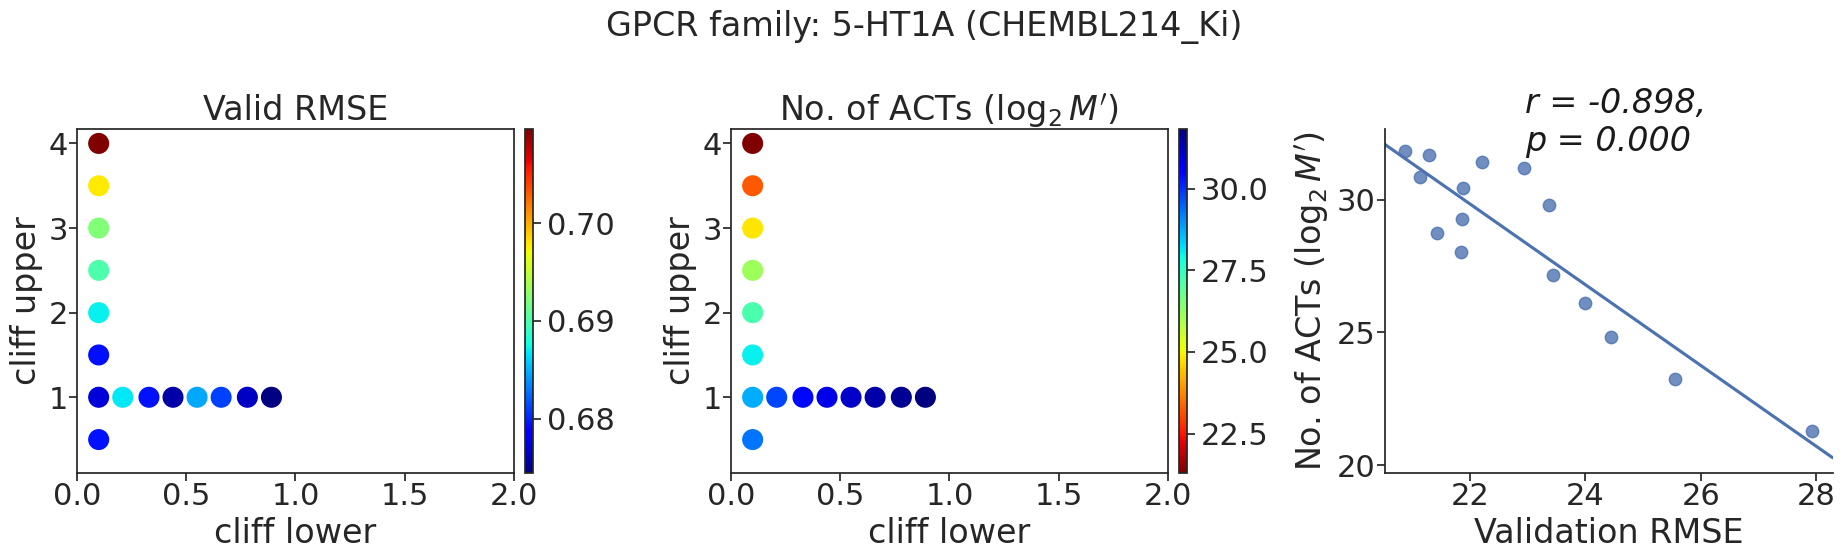

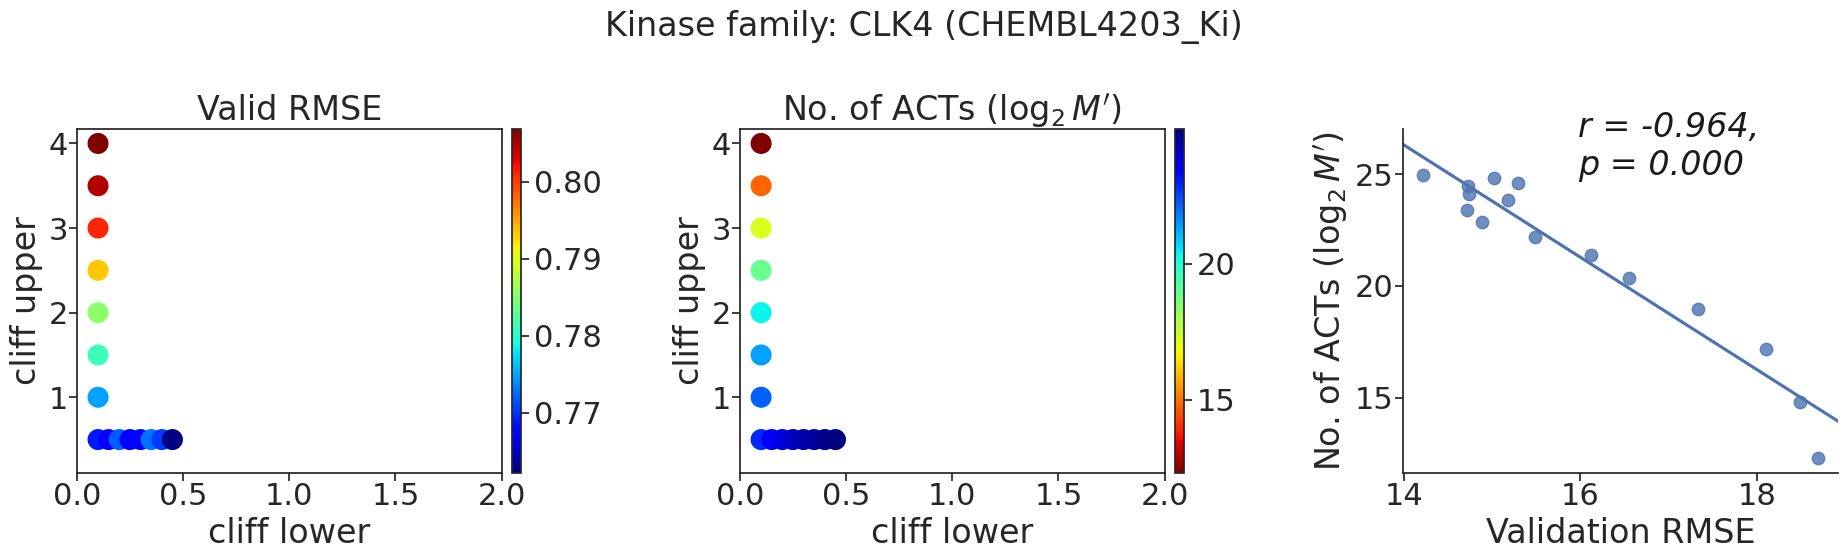

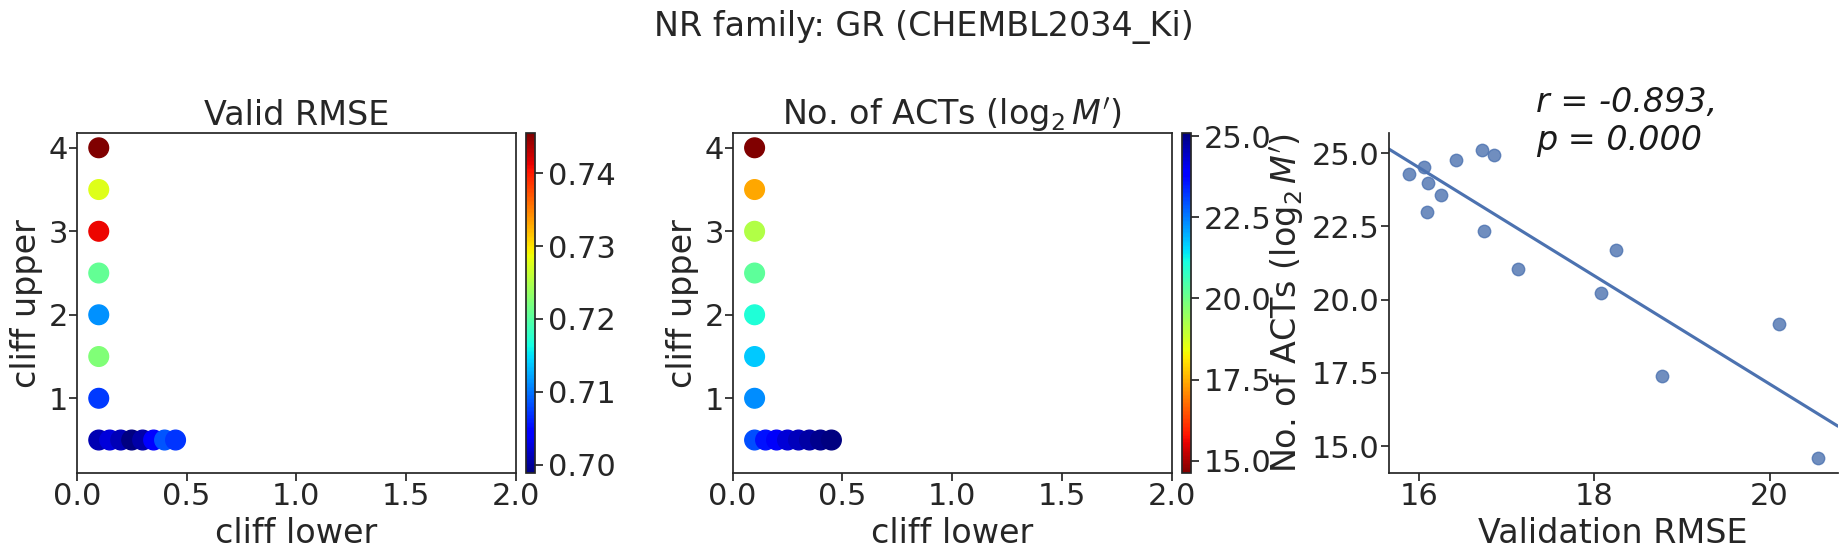

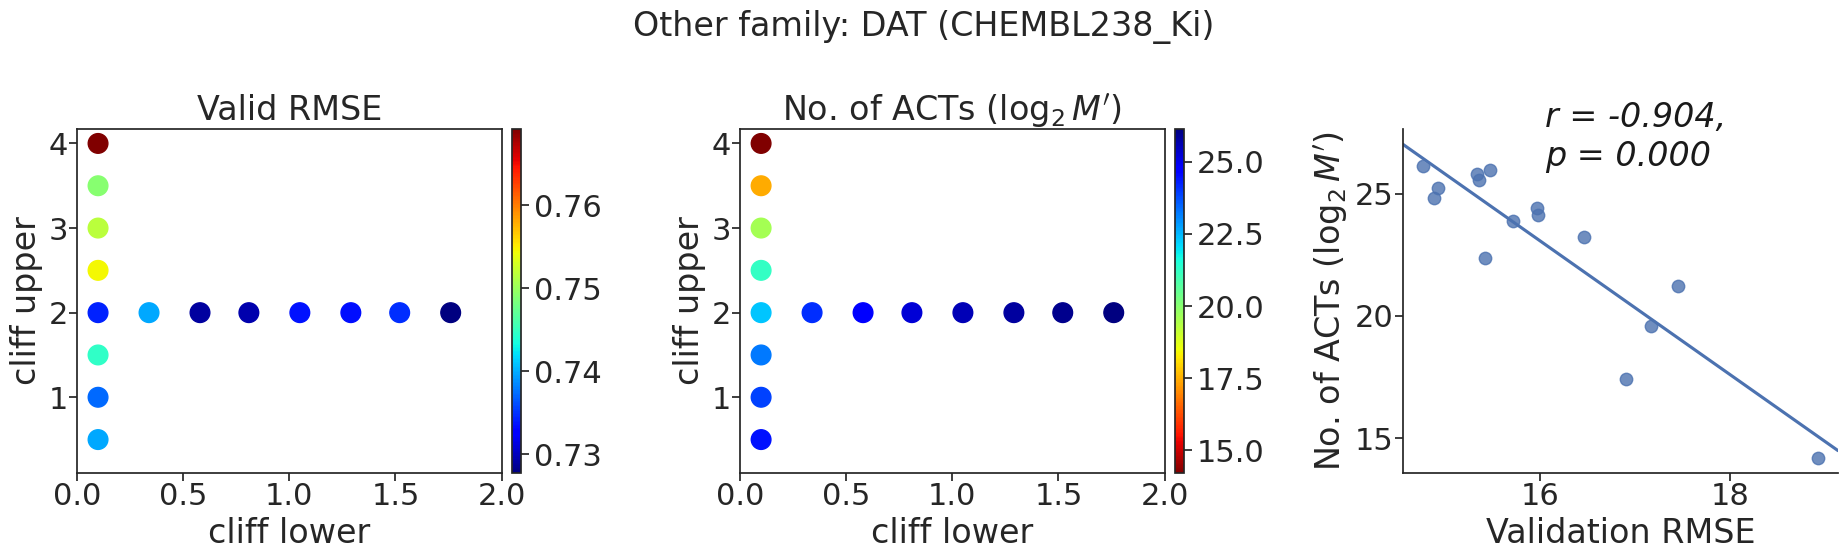

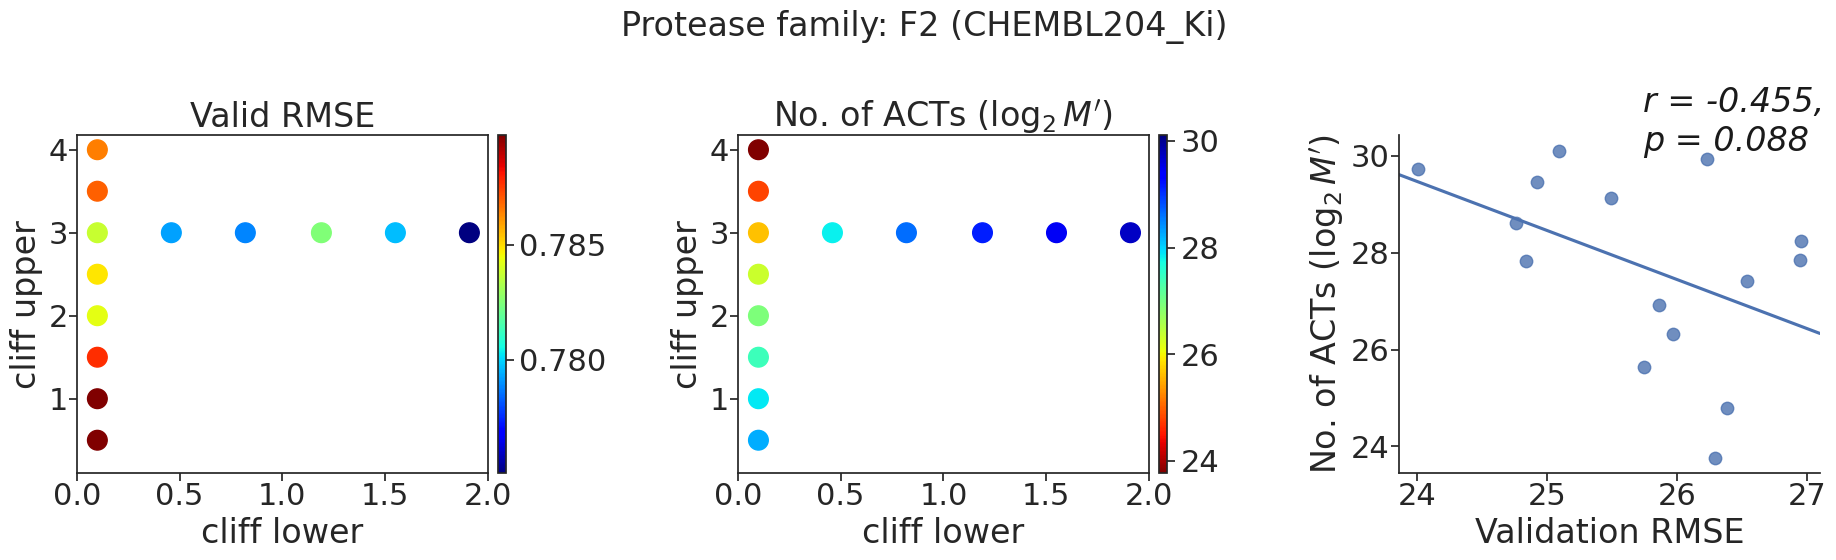

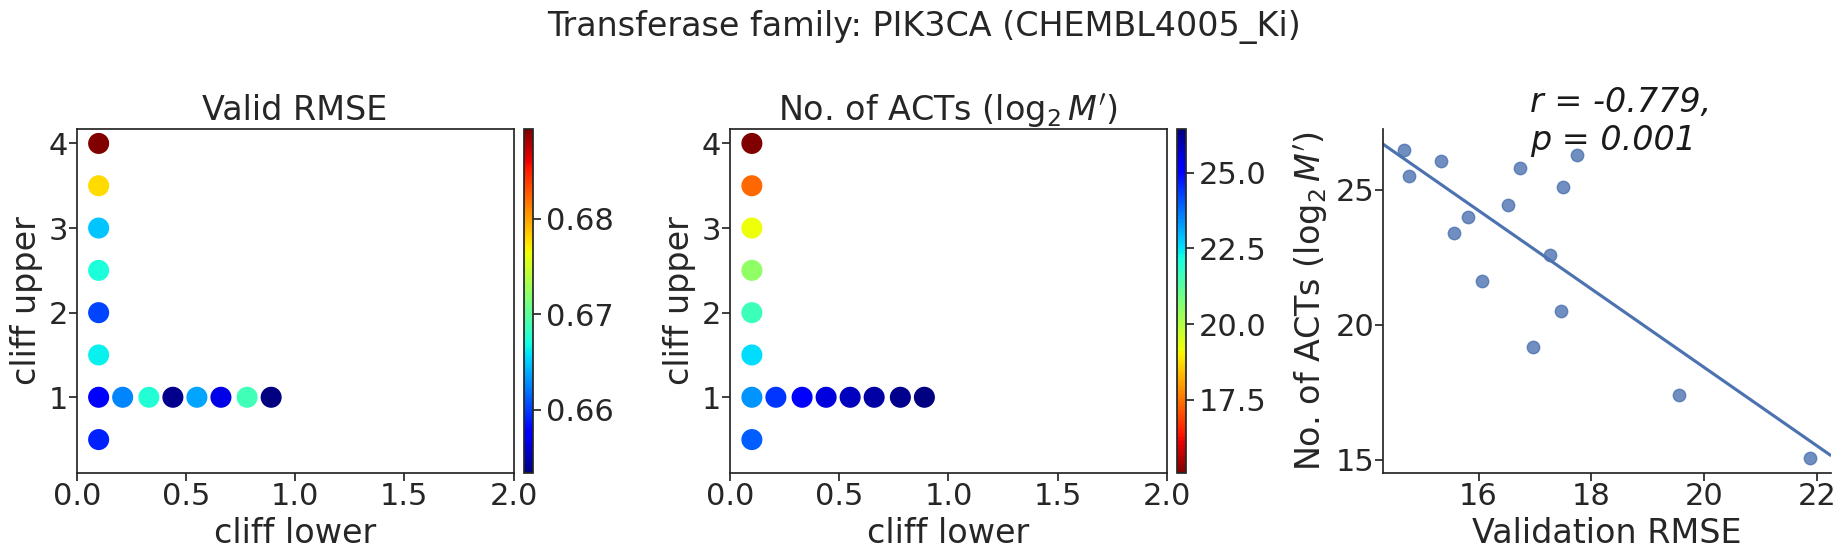

In [40]:
flist = []
for idx, ts in selected.iterrows():
    dataset_name = ts.Dataset
    cls = ts['Receptor Class']
    abb = ts.Abbriviation
    name = f'{cls} family: {abb} ({dataset_name})'
    dfc = df[df.dataset == dataset_name]
    fig = plot_dfc_dfm(dfc, name)
    flist.append(fig)
    fig.savefig(f'./{dataset_name}.svg', bbox_inches='tight')